In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from numpy import floor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve

import warnings
warnings.simplefilter(action='ignore')

In [2]:
pwd

'C:\\Users\\Manish'

In [3]:
house_df = pd.read_csv("C:\\Users\\Manish\\house_data.csv")
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# PART 1 

### TASK - 1

In [4]:
h_df= house_df[['SalePrice','GrLivArea','LotArea','FullBath','GarageCars','GarageArea','YearBuilt','YrSold']]
h_df

,SalePrice,GrLivArea,LotArea,FullBath,GarageCars,GarageArea,YearBuilt,YrSold
0,208500,1710,8450,2,2,548,2003,2008
1,181500,1262,9600,2,2,460,1976,2007
2,223500,1786,11250,2,2,608,2001,2008
3,140000,1717,9550,1,3,642,1915,2006
4,250000,2198,14260,2,3,836,2000,2008
...,...,...,...,...,...,...,...,...
1455,175000,1647,7917,2,2,460,1999,2007
1456,210000,2073,13175,2,2,500,1978,2010
1457,266500,2340,9042,2,1,252,1941,2010
1458,142125,1078,9717,1,1,240,1950,2010


### TASK - 2

In [5]:
h_df['AgeWhensold']=h_df['YrSold'] - h_df['YearBuilt']
h_df

,SalePrice,GrLivArea,LotArea,FullBath,GarageCars,GarageArea,YearBuilt,YrSold,AgeWhensold
0,208500,1710,8450,2,2,548,2003,2008,5
1,181500,1262,9600,2,2,460,1976,2007,31
2,223500,1786,11250,2,2,608,2001,2008,7
3,140000,1717,9550,1,3,642,1915,2006,91
4,250000,2198,14260,2,3,836,2000,2008,8
...,...,...,...,...,...,...,...,...,...
1455,175000,1647,7917,2,2,460,1999,2007,8
1456,210000,2073,13175,2,2,500,1978,2010,32
1457,266500,2340,9042,2,1,252,1941,2010,69
1458,142125,1078,9717,1,1,240,1950,2010,60


### TASK - 3

In [6]:
h_df.drop(h_df[(h_df['GrLivArea']>2600) | (h_df['LotArea']>40000)].index, inplace=True)
h_df                                                                                       

,SalePrice,GrLivArea,LotArea,FullBath,GarageCars,GarageArea,YearBuilt,YrSold,AgeWhensold
0,208500,1710,8450,2,2,548,2003,2008,5
1,181500,1262,9600,2,2,460,1976,2007,31
2,223500,1786,11250,2,2,608,2001,2008,7
3,140000,1717,9550,1,3,642,1915,2006,91
4,250000,2198,14260,2,3,836,2000,2008,8
...,...,...,...,...,...,...,...,...,...
1455,175000,1647,7917,2,2,460,1999,2007,8
1456,210000,2073,13175,2,2,500,1978,2010,32
1457,266500,2340,9042,2,1,252,1941,2010,69
1458,142125,1078,9717,1,1,240,1950,2010,60


# PART 2 

### TASK - 1

In [7]:
X1 = np.array(h_df['GrLivArea']).reshape(-1, 1)
y1 = np.array(h_df['SalePrice']).reshape(-1, 1)

In [8]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.20, random_state=0)

### TASK - 2

In [9]:
regr = LinearRegression()

In [10]:
regr.fit(X_train1, y_train1)
y_pred1 = regr.predict(X_test1)
y_pred1


array([[128148.31256864],
       [200073.3047976 ],
       [227703.02742214],
       [221124.52203535],
       [110057.42275495],
       [122227.65772053],
       [184394.53362574],
       [218822.04514997],
       [252262.78086618],
       [231430.84714133],
       [191301.96428188],
       [113017.75017901],
       [194700.85873172],
       [181214.92268879],
       [282414.26388899],
       [108851.36343404],
       [148212.75399837],
       [211804.97273739],
       [128148.31256864],
       [227264.46039636],
       [188451.27861427],
       [205993.95964572],
       [217506.34407261],
       [139112.4882133 ],
       [192727.30711568],
       [191850.17306411],
       [132533.9828265 ],
       [108851.36343404],
       [202814.34870877],
       [148322.39575481],
       [119157.68854002],
       [189986.26320452],
       [185819.87645955],
       [262240.18070282],
       [134507.53444254],
       [284716.74077437],
       [145690.9936001 ],
       [148760.9627806 ],
       [1788

In [11]:
print("Reg Score :",regr.score(X_test1, y_test1))
print("R2 score: ",metrics.r2_score(y_test1,y_pred1))
print("Mean squared error :",metrics.mean_squared_error(y_test1,y_pred1))
print("Root Mean Squared Eroor(RMSE): ",np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)))


Reg Score : 0.390909759672075
R2 score:  0.390909759672075
Mean squared error : 2985696628.4439244
Root Mean Squared Eroor(RMSE):  54641.52842338805


### TASK - 3

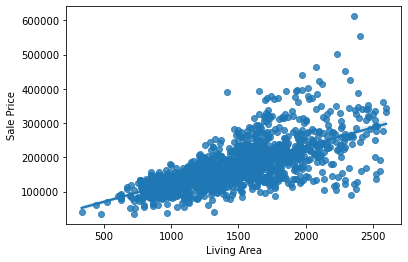

In [12]:
sns.regplot(X1,y1)
plt.xlabel("Living Area") 
plt.ylabel("Sale Price")
plt.show()

### TASK - 4

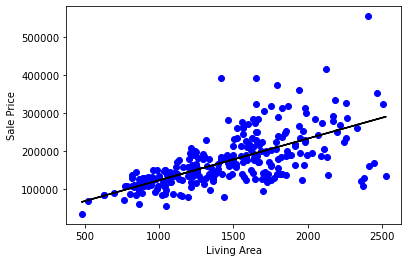

In [13]:

plt.scatter(X_test1, y_test1, color ='b')
plt.plot(X_test1, y_pred1, color ='k')
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
  
plt.show()

In [14]:
print("R2 score: ",metrics.r2_score(y_test1,y_pred1))
print("Root Mean Squared Eroor(RMSE): ",np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)))         

R2 score:  0.390909759672075
Root Mean Squared Eroor(RMSE):  54641.52842338805


### TASK - 5

In [15]:
X2 = np.array(h_df['GrLivArea']).reshape(-1, 1)
y2 = np.array(h_df['SalePrice']).reshape(-1, 1)

In [16]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.80, random_state=0)

In [17]:
regs = LinearRegression()

In [18]:
regs.fit(X_train2, y_train2)
y_pred2 = regs.predict(X_test2)
y_pred2

array([[126798.11288268],
       [197668.08184815],
       [224892.52114587],
       ...,
       [160828.66200482],
       [171740.04442176],
       [239585.07568749]])

In [19]:
print("Reg Score :",regs.score(X_test2, y_test2))
print("R2 score: ",metrics.r2_score(y_test2,y_pred2))
print("Mean squared error :",metrics.mean_squared_error(y_test2,y_pred2))
print("Root Mean Squared Eroor(RMSE): ",np.sqrt(metrics.mean_squared_error(y_test2,y_pred2)))


Reg Score : 0.43958089982229565
R2 score:  0.43958089982229565
Mean squared error : 2726720306.4523582
Root Mean Squared Eroor(RMSE):  52218.00749217034


# PART 3

### TASK - 1

In [20]:
feature_cols=['GrLivArea','GarageArea','LotArea','AgeWhensold']
x3=h_df[feature_cols]
Y3=h_df.SalePrice

In [21]:
x_train3, x_test3, Y_train3, Y_test3 = train_test_split(x3, Y3, test_size = 0.20, random_state=80)

### TASK - 2

In [22]:
reg = LinearRegression()
reg.fit(x_train3, Y_train3)                                
Y_pred3 = reg.predict(x_test3)
Y_pred3


array([216111.73162108, 151106.10693583, 168754.22804717, 246296.99224469,
       150193.28345664, 129945.13522954, 178155.9340159 , 272384.74087282,
       117625.09243269, 169912.30800759, 122178.4186912 , 261194.26235201,
       186206.80553975, 244948.90850291, 201369.72897466, 195185.42394035,
       184190.56510977, 142831.81115735, 105193.38371782, 128282.24854864,
       209340.09668237, 144376.02552663, 120110.79722127, 172947.55333766,
        89016.15539224, 213173.65168453, 165160.20415855,  92689.962939  ,
       177425.71772444, 150629.09222251, 128561.01116935, 126451.94963797,
       146923.65488015, 152951.57488761, 136487.71256616, 164827.38928375,
       139515.54316272, 251309.10132869, 155869.23386088, 215710.66220157,
       128447.7499893 , 187776.75230837, 252038.6469421 , 287081.27647827,
       245394.57608359,  89143.90677849,  97942.7116208 , 127025.73319171,
       190199.78326441, 123625.07804423, 210664.53853112, 198219.35131322,
       233198.43930504, 1

In [23]:
print("Reg Score :",reg.score(x_test3, Y_test3))
print("R2 score: ",metrics.r2_score(Y_test3,Y_pred3))
print("Mean squared error :",metrics.mean_squared_error(Y_test3,Y_pred3))
print("Root Mean Squared Eroor(RMSE): ",np.sqrt(metrics.mean_squared_error(Y_test3,Y_pred3)))

Reg Score : 0.7714409606492196
R2 score:  0.7714409606492196
Mean squared error : 879752476.55927
Root Mean Squared Eroor(RMSE):  29660.621648226963


### TASK - 3                 

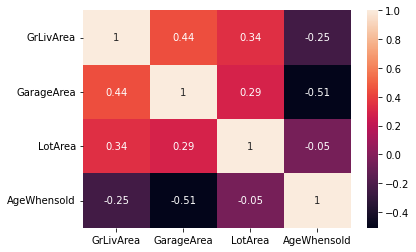

In [24]:
correlation_matrix=x3.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)
plt.show()

In [25]:
reg = LinearRegression()
reg.fit(x_train3, Y_train3)

price_predictor=reg.fit(x_train3,Y_train3)
data={"GrLivArea":400,"GarageArea":80,"LotArea":2000,"AgeWhensold":40}
house_price=pd.DataFrame(data,index=[0],columns=["GrLivArea","GarageArea","LotArea","AgeWhensold"])
n_y_pred=price_predictor.predict(house_price)
print("Predicted price :{0}".format(round(n_y_pred[0])))

Predicted price :53800


In [26]:
def KNN(k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train3, Y_train3)
    pred_k = knn.predict(x_test3)
    print('when k = ',k , 'or ',round(knn.score(x_test3, Y_test3)*100,0),'%', ";", pred_k)

In [27]:
for i in range(1,21):
    KNN(i)

when k =  1 or  1.0 % ; [208500 174900 220000 178000 158000 147400 155000 281000 109900 106000
 145900 110000 146000 232000 130000 174000 213490 163500 179000 109000
 159000 148000 113000 139950 150000 231500 184900  79900 187750 185000
 174500  83000 149000 169500 132000 140000 142000 271000 168500 260000
  91500 196000 222000 325000 210000 164500  85000 138500 177000 145000
 269790 188500 230000 159000 145000 239900 132000 138800 262500 230000
 149900 276000 149000  85000 333168 164500 178000 167500 262500 395192
 162900 141000 130000 171000 125000 163000 190000 165000 187750 179665
  86000 134900 168000 134800 118000  67000 170000 164500 163000 239799
 144000 129900 158500 250580 157000 261500 140000  79000 156000 145000
 196000 148000  87500 117000 145000 226000 162900 112000 265000 155835
 227000 230000 120500 164500 113000 160000 248900 325624 110000 127000
 176000 227875 187750 207500 151500 223500 148000 183000 130500  82500
 145500 160000 289000 145000  96500 239000 185000 231

# PART 4 

### TASK - 1

In [28]:
a=h_df[(h_df.FullBath)>=1]

In [29]:
x4=a[['GrLivArea']]
y4=a[['FullBath']]

In [30]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size = 0.20, random_state=0)

In [31]:
reg1 = LinearRegression()
reg1.fit(x_train4, y_train4)
y_pred4 = reg1.predict(x_test4)
y_pred4

array([[1.55178618],
       [2.03415875],
       [1.53323339],
       [1.54955984],
       [1.7187613 ],
       [1.38926373],
       [1.07980317],
       [1.17850402],
       [1.13620365],
       [1.78703557],
       [1.46495911],
       [1.53100705],
       [1.48648035],
       [1.77887234],
       [1.18295669],
       [1.03230802],
       [1.39965329],
       [1.07980317],
       [1.15549856],
       [1.51319637],
       [1.43601676],
       [1.60521822],
       [1.76848278],
       [1.26087841],
       [1.77070911],
       [1.41597975],
       [1.09167696],
       [1.8271096 ],
       [1.23416239],
       [1.68536627],
       [1.35883715],
       [1.50800159],
       [1.63267635],
       [1.57553375],
       [1.09316118],
       [1.48351191],
       [1.3618056 ],
       [1.53694394],
       [1.22228861],
       [1.16885657],
       [1.66755559],
       [1.01746579],
       [1.53842817],
       [1.55178618],
       [2.32506652],
       [1.28165754],
       [1.23193606],
       [1.313

In [32]:
print("Reg Score :",reg1.score(x_test4, y_test4))
print("R2 score: ",metrics.r2_score(y_test4,y_pred4))
print("Mean squared error :",metrics.mean_squared_error(y_test4,y_pred4))
print("Root Mean Squared Eroor(RMSE): ",np.sqrt(metrics.mean_squared_error(y_test4,y_pred4)))


Reg Score : 0.4251306056035492
R2 score:  0.4251306056035492
Mean squared error : 0.14425291348183808
Root Mean Squared Eroor(RMSE):  0.37980641579867774


In [33]:
ab=a[['GrLivArea','FullBath']]

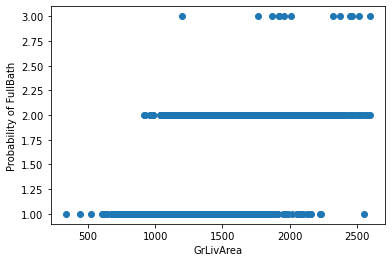

In [34]:
ab.loc[ab["FullBath"]=="1", "default"]=0
ab.loc[ab["FullBath"]=="2", "default"]=1
X5 = ab["GrLivArea"].values.reshape(-1,1)
Y5 = ab["FullBath"].values.reshape(-1,1)

LogR = LogisticRegression()
LogR.fit(X5,np.ravel(Y5.astype(int)))

plt.scatter(X5,Y5)
plt.xlabel("GrLivArea")
plt.ylabel("Probability of FullBath")
plt.show()

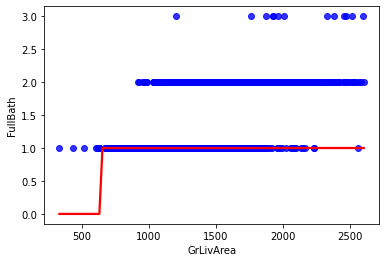

In [35]:
x6 = a['GrLivArea']
y6 = a['FullBath']    

#plot logistic regression curve
sns.regplot(x=x6, y=y6, data=a, logistic=True, ci=None,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

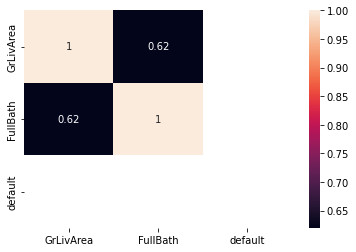

In [36]:
correlation_matrix1=ab.corr().round(2)
sns.heatmap(data=correlation_matrix1,annot=True)
plt.show()

#### For garage area :

In [37]:
feature=a['GarageArea']
x7=np.array(a['GarageArea']).reshape(-1,1)
y7=np.array(a['FullBath']).reshape(-1,1)


In [38]:
x_train7, x_test7, y_train7, y_test7 = train_test_split(x7, y7, test_size = 0.20, random_state=0)

In [39]:
reg2 = LinearRegression()
reg2.fit(x_train7, y_train7)
y_pred7 = reg2.predict(x_test7)
y_pred7

array([[1.66769475],
       [1.50976683],
       [1.59208078],
       [1.41596722],
       [1.45138136],
       [1.56815231],
       [1.48966691],
       [1.63898059],
       [1.35566747],
       [1.55092381],
       [1.62366636],
       [1.47052414],
       [1.45520991],
       [1.65046625],
       [1.34035324],
       [1.08766857],
       [1.54039528],
       [1.48966691],
       [1.35566747],
       [1.50115258],
       [1.59303792],
       [1.52029536],
       [1.54135242],
       [1.3614103 ],
       [1.61026642],
       [1.63515203],
       [1.08766857],
       [1.39873872],
       [1.38246735],
       [1.08766857],
       [1.59303792],
       [1.63898059],
       [1.74043731],
       [1.53943814],
       [1.08766857],
       [1.52603819],
       [1.34705321],
       [1.80935131],
       [1.33652469],
       [1.29441057],
       [1.58538081],
       [1.57006658],
       [1.67152331],
       [1.08766857],
       [1.89549382],
       [1.60835214],
       [1.38629591],
       [1.298

In [40]:
print("Mean squared error :",metrics.mean_squared_error(y_test7,y_pred7))
print("Root Mean Squared Eroor(RMSE): ",np.sqrt(metrics.mean_squared_error(y_test7,y_pred7)))


Mean squared error : 0.20364630322080776
Root Mean Squared Eroor(RMSE):  0.4512718728447495


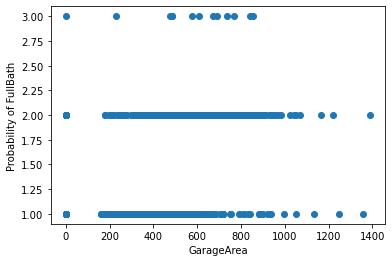

In [41]:
a.loc[a["FullBath"]=="1", "default"]=0
a.loc[a["FullBath"]=="2", "default"]=1
X8 = a["GarageArea"].values.reshape(-1,1)
Y8 = a["FullBath"].values.reshape(-1,1)

LogR = LogisticRegression()
LogR.fit(X8,np.ravel(Y8.astype(int)))

plt.scatter(X8,Y8)
plt.xlabel("GarageArea")
plt.ylabel("Probability of FullBath")
plt.show()

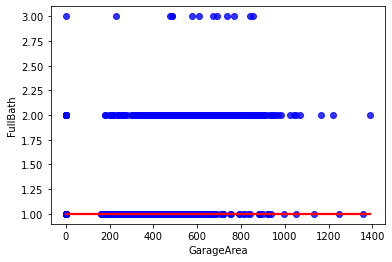

In [42]:
x9 = a['GarageArea']
y9 = a['FullBath']

#plot logistic regression curve
sns.regplot(x=x9, y=y9, data=a, logistic=True, ci=None,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

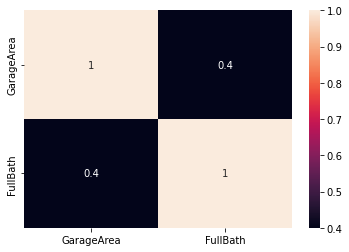

In [43]:
ac=a[['GarageArea','FullBath']]
correlation_matrix1=ac.corr().round(2)
sns.heatmap(data=correlation_matrix1,annot=True)
plt.show()

### TASK - 2

In [44]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import numpy as np


reg3= RandomForestClassifier(n_estimators=10, random_state=1)      
reg3.fit(x_train7, y_train7)
LR_prob=reg3.predict_proba(pd.DataFrame(np.array(x_test7)))
h_df.loc[np.where(LR_prob[:,0]>0.9)]['GarageArea']                 

3      642
8      468
18     576
23     572
27     772
28     319
35     691
36     672
38     246
47     826
56     480
64     645
66     576
67     558
85     462
92     432
94     684
110    325
111    400
114    180
125      0
126    440
130    487
132    624
137    766
151    866
152    495
165      0
179    480
202    398
212    644
216    484
222    434
236    494
243    288
246    440
251    538
269    504
Name: GarageArea, dtype: int64

### TASK 3 

##### For GarageArea and FullBath

In [45]:
df2=h_df[['GarageArea','FullBath']]
df2.head()

,GarageArea,FullBath
0,548,2
1,460,2
2,608,2
3,642,1
4,836,2


In [46]:
FullBath_dummies = pd.get_dummies(df2.FullBath, prefix="FullBath")
df2=pd.concat([df2,FullBath_dummies],axis='columns')
df2.drop('FullBath',axis='columns',inplace=True)
df2

,GarageArea,FullBath_0,FullBath_1,FullBath_2,FullBath_3
0,548,0,0,1,0
1,460,0,0,1,0
2,608,0,0,1,0
3,642,0,1,0,0
4,836,0,0,1,0
...,...,...,...,...,...
1455,460,0,0,1,0
1456,500,0,0,1,0
1457,252,0,0,1,0
1458,240,0,1,0,0


In [47]:
data_train11, data_test11=train_test_split(df2,train_size=0.8,random_state=10)
x_train11=data_train11.drop(columns='FullBath_1',axis=1)
y_train11=data_train11['FullBath_1']
x_test11=data_test11.drop(columns='FullBath_1',axis=1)
y_test11=data_test11['FullBath_1']
x_train11.shape, y_train11.shape, x_test11.shape                                  


((1116, 4), (1116,), (280, 4))

In [48]:
reg11=LogisticRegression()
reg11.fit(x_train11,y_train11)
y_pred11=reg11.predict(x_test11)
y_pred11

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [49]:
#y_test11

In [50]:
lr_probs=reg11.predict_proba(pd.DataFrame(np.array(x_test11)))
ns_probs=[0 for _ in range(len(y_test11))]

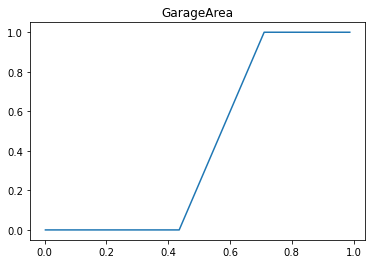

In [51]:
sns.lineplot(lr_probs[:,1],y_pred11)
plt.title('GarageArea')
plt.show()


In [52]:
#lr_probs

In [53]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_fpr, ns_tpr, _ = roc_curve(y_test11,ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test11,lr_probs[:,1])


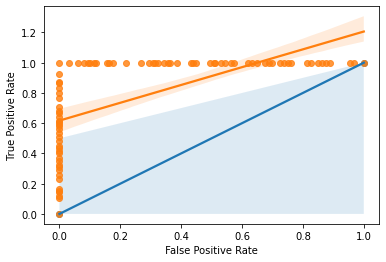

In [54]:
sns.regplot(ns_fpr,ns_tpr,label='No Skill')
sns.regplot(lr_fpr,lr_tpr,label='Logistic')
plt.xlabel(' False Positive Rate ') 
plt.ylabel(' True Positive Rate ')
plt.show()                       

##### For GrLiveArea and FullBath

In [55]:
df3=h_df[['GrLivArea','FullBath']]
print(df3.columns)
print(df3.head())

Index(['GrLivArea', 'FullBath'], dtype='object')
   GrLivArea  FullBath
0       1710         2
1       1262         2
2       1786         2
3       1717         1
4       2198         2


In [56]:
FullBath_dummies1 = pd.get_dummies(df3.FullBath, prefix="FullBath")
df3=pd.concat([df3,FullBath_dummies1],axis='columns')
df3.drop('FullBath',axis='columns',inplace=True)
df3.head()

,GrLivArea,FullBath_0,FullBath_1,FullBath_2,FullBath_3
0,1710,0,0,1,0
1,1262,0,0,1,0
2,1786,0,0,1,0
3,1717,0,1,0,0
4,2198,0,0,1,0


In [57]:
data_train11_1, data_test11_1=train_test_split(df3,train_size=0.8,random_state=10)
x_train11_1=data_train11_1.drop(columns='FullBath_1',axis=1)
y_train11_1=data_train11_1['FullBath_1']
x_test11_1=data_test11_1.drop(columns='FullBath_1',axis=1)
y_test11_1=data_test11_1['FullBath_1']
x_train11_1.shape, y_train11_1.shape, x_test11_1.shape 

((1116, 4), (1116,), (280, 4))

In [58]:
reg11_1=LogisticRegression()
reg11_1.fit(x_train11_1,y_train11_1)
y_pred11_1=reg11_1.predict(x_test11_1)
y_pred11_1

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [60]:
lr_probs=reg11_1.predict_proba(pd.DataFrame(np.array(x_test11_1)))
ns_probs=[0 for _ in range(len(y_test11_1))]

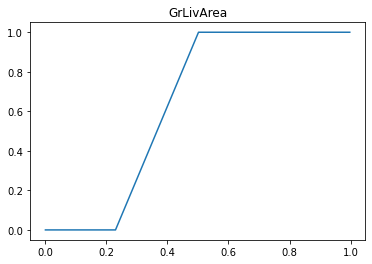

In [61]:
sns.lineplot(lr_probs[:,1],y_pred11_1)
plt.title('GrLivArea')
plt.show()

In [62]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_fpr, ns_tpr, _ = roc_curve(y_test11_1,ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test11_1,lr_probs[:,1])


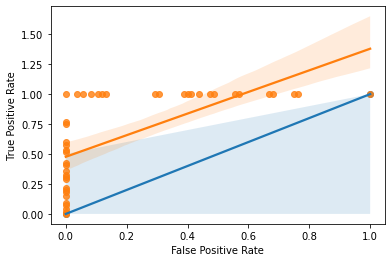

In [63]:
sns.regplot(ns_fpr,ns_tpr,label='No Skill')
sns.regplot(lr_fpr,lr_tpr,label='Logistic')
plt.xlabel(' False Positive Rate ') 
plt.ylabel(' True Positive Rate ')
plt.show()  

# PART 5 

### TASK - 1

In [64]:
new_df=h_df[h_df['GarageCars']!=0]
new_df

,SalePrice,GrLivArea,LotArea,FullBath,GarageCars,GarageArea,YearBuilt,YrSold,AgeWhensold
0,208500,1710,8450,2,2,548,2003,2008,5
1,181500,1262,9600,2,2,460,1976,2007,31
2,223500,1786,11250,2,2,608,2001,2008,7
3,140000,1717,9550,1,3,642,1915,2006,91
4,250000,2198,14260,2,3,836,2000,2008,8
...,...,...,...,...,...,...,...,...,...
1455,175000,1647,7917,2,2,460,1999,2007,8
1456,210000,2073,13175,2,2,500,1978,2010,32
1457,266500,2340,9042,2,1,252,1941,2010,69
1458,142125,1078,9717,1,1,240,1950,2010,60


### TASK - 2

In [85]:
feature_cols1=['SalePrice','GrLivArea','LotArea','FullBath','GarageArea','YearBuilt','YrSold','AgeWhensold']
X=new_df[feature_cols1]
y=new_df.GarageCars

In [86]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape, y_train.shape, X_test.shape 

((921, 8), (921,), (396, 8))

In [87]:
clf = DecisionTreeClassifier(max_depth=3)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred))      

Accuracy Score : 0.9015151515151515


### TASK - 3 

In [77]:
X = np.array(new_df['GarageCars']).reshape(-1, 1)
y = np.array(new_df['LotArea']).reshape(-1, 1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)
X_train.shape, y_train.shape, X_test.shape

((1053, 1), (1053, 1), (264, 1))

In [79]:
clf = DecisionTreeClassifier(max_depth=2)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)    

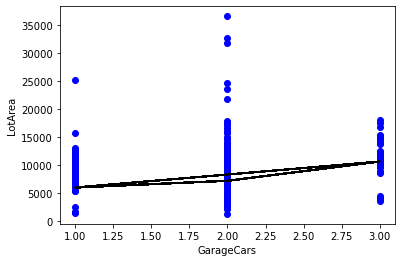

In [80]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.xlabel('GarageCars')
plt.ylabel('LotArea')
plt.show()

In [81]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [88]:
#Accuracy at max depth 2

clf = DecisionTreeClassifier(max_depth=2)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred)) 

Accuracy Score : 0.9015151515151515


In [89]:
# Accuracy at max depth 4

clf = DecisionTreeClassifier(max_depth=4)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred)) 

Accuracy Score : 0.898989898989899


In [90]:
# Accuracy at max depth 5

clf = DecisionTreeClassifier(max_depth=5)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred)) 

Accuracy Score : 0.9217171717171717


In [91]:
# Accuracy at max depth 6

clf = DecisionTreeClassifier(max_depth=6)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred)) 

Accuracy Score : 0.898989898989899


##### Accuracy Score is higher at max_depth 5 